In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
diabetes_dataset=load_diabetes()

In [4]:
dir(diabetes_dataset)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [5]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
pd.DataFrame(diabetes_dataset.target).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [7]:
data=pd.DataFrame(diabetes_dataset.data,columns=['Age','Sex','Bmi','Bp','Tc','Ldl','Hdl','Tch','Ltg','Glu'])
data['Target']=diabetes_dataset.target
target=pd.DataFrame(diabetes_dataset.target,columns=['Target'])

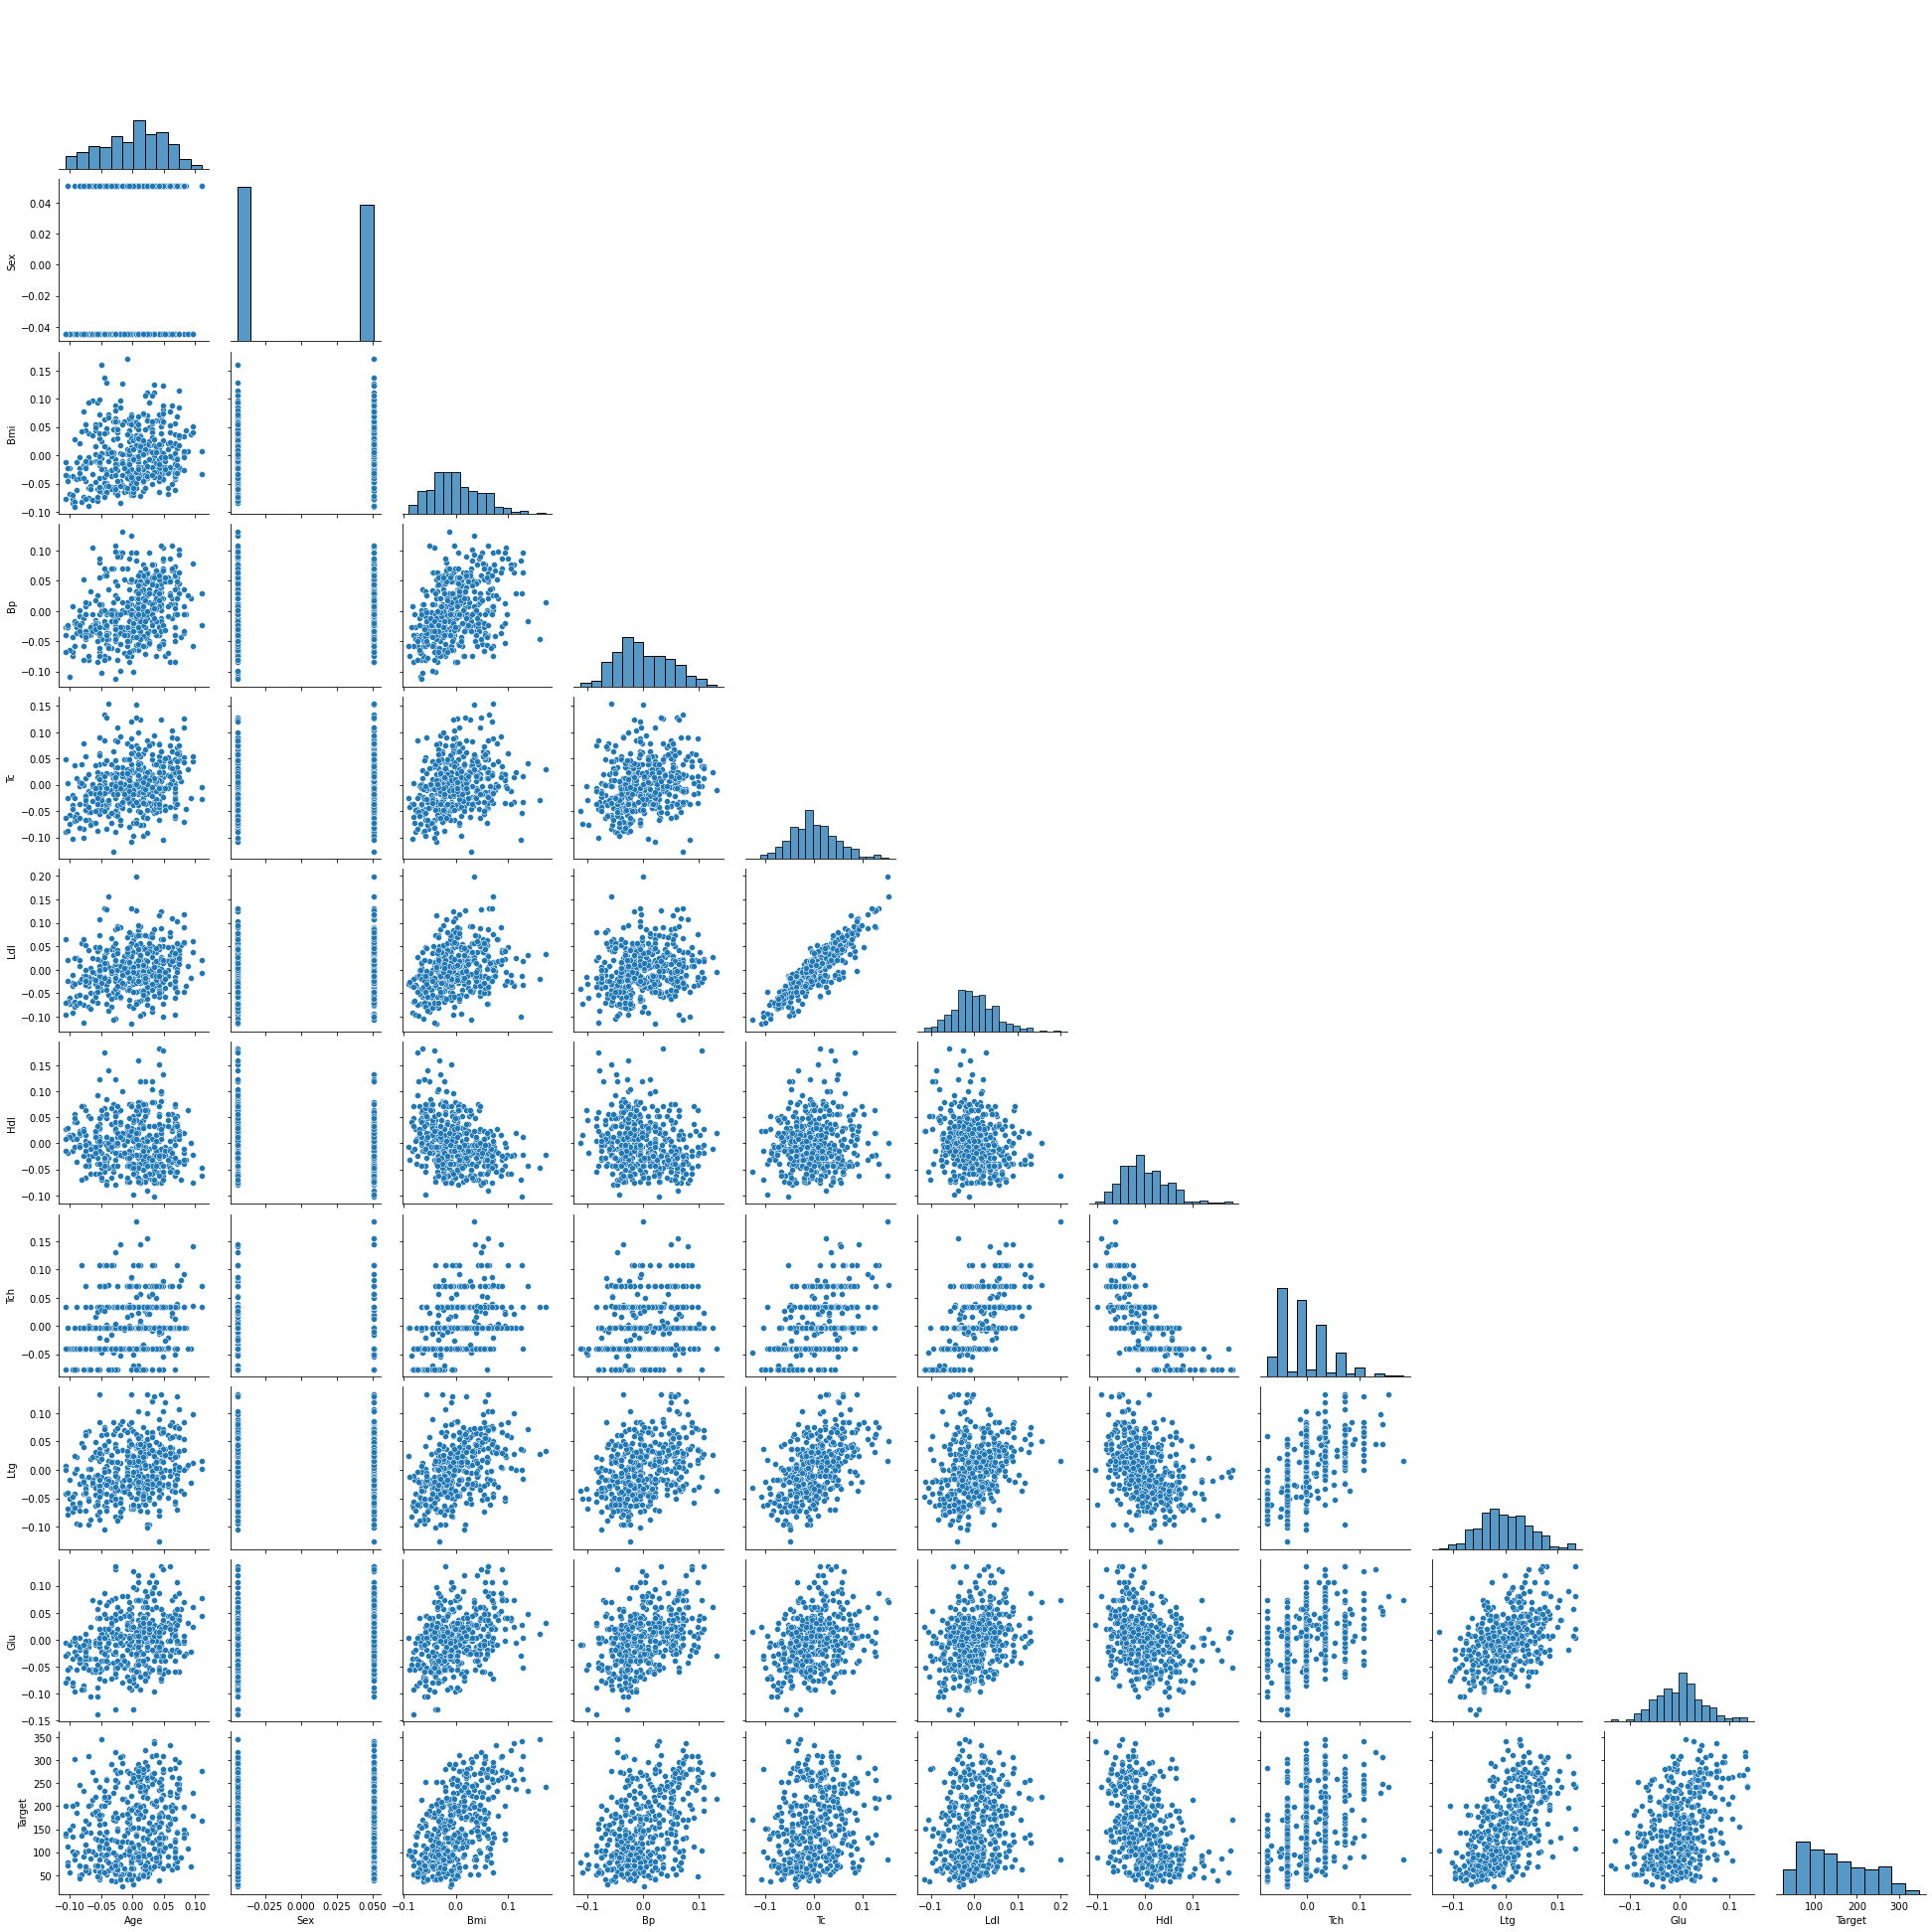

In [8]:
%%time
sns.pairplot(data,corner=True)
plt.show()

Wall time: 18.5 s


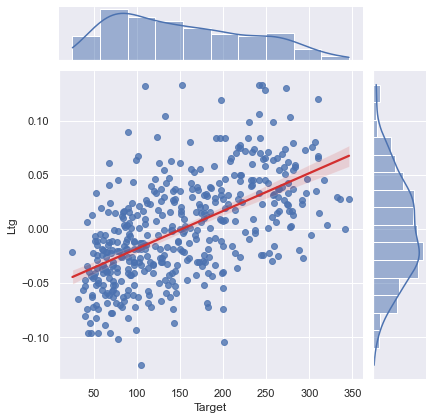

In [9]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Target'],y=data['Ltg'],kind="reg", joint_kws={"line_kws":{'color':'#D32F2F'}})
plt.show()

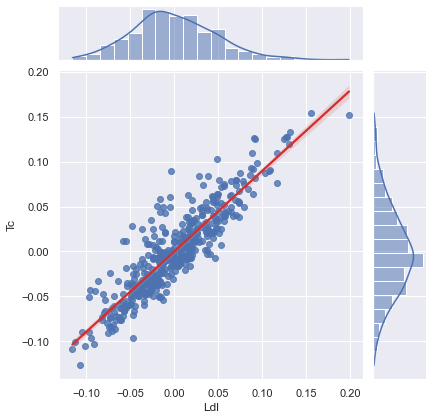

In [10]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Ldl'],y=data['Tc'],kind="reg", joint_kws={"line_kws":{'color':'#D32F2F'}})
plt.show()

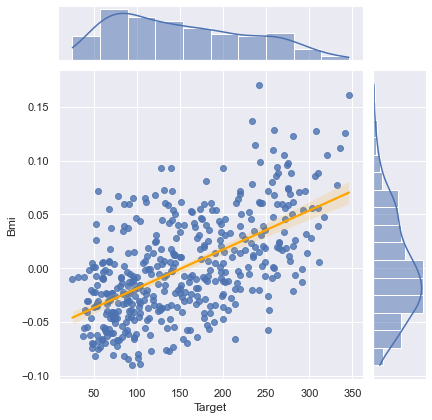

In [11]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Target'],y=data['Bmi'],kind="reg", joint_kws={"line_kws":{'color':'orange'}})
plt.show()

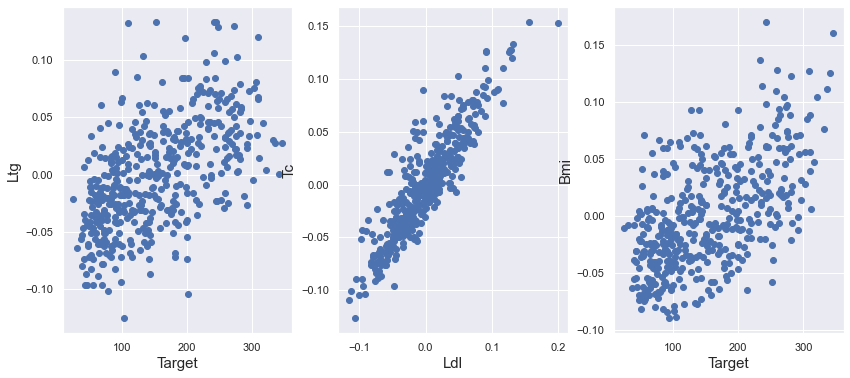

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)

plt.scatter(data['Target'],data['Ltg'],)
plt.xlabel('Target',size=15)
plt.ylabel('Ltg',size=15)

plt.subplot(1,3,2)
plt.scatter(data['Ldl'],data['Tc'])
plt.xlabel('Ldl',size=15)
plt.ylabel('Tc',size=15)

plt.subplot(1,3,3)
plt.scatter(data['Target'],data['Bmi'])
plt.xlabel('Target',size=15)
plt.ylabel('Bmi',size=15)

plt.show()

In [13]:
masks=np.zeros_like(data.corr())
triau_ang=np.triu_indices_from(masks)
masks[triau_ang]=True

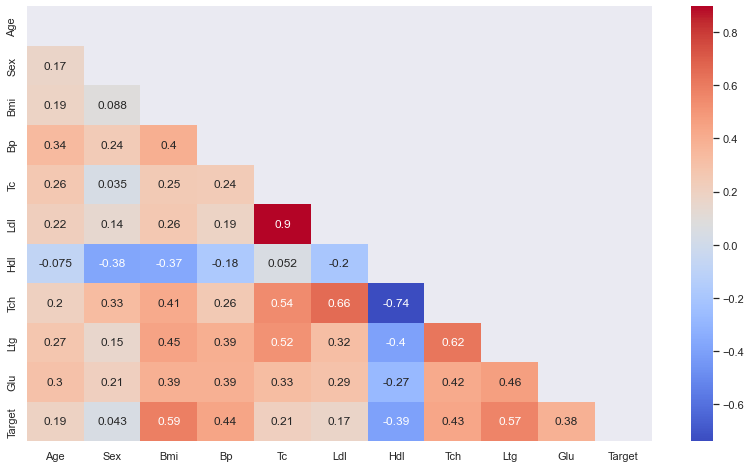

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(data=data.corr(),mask=masks, annot=True,cmap=cm.coolwarm)
plt.style.use('fivethirtyeight')
plt.show()

In [15]:
featurs=data.drop(['Target','Hdl','Tch'],axis=1)
X_train,x_test,Y_train,y_test= train_test_split(np.array(featurs),np.array(target),test_size=0.3)
print(f'features type {type(featurs)}\nTarget type {type(target)}')

features type <class 'pandas.core.frame.DataFrame'>
Target type <class 'pandas.core.frame.DataFrame'>


In [16]:
X_constant=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_constant)
results=model.fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     43.90
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.00e-46
Time:                        19:46:23   Log-Likelihood:                -1667.8
No. Observations:                 309   AIC:                             3354.
Df Residuals:                     300   BIC:                             3387.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9238      3.099     49.349      0.0

In [18]:
Table=pd.DataFrame(results.pvalues,columns=['P-value']).round(3)
Table['BIC']=results.bic.round(2)
Table

,P-value,BIC
0,0.000,3387.24
1,0.289,3387.24
2,0.015,3387.24
3,0.000,3387.24
4,0.000,3387.24
5,0.000,3387.24
6,0.001,3387.24
7,0.000,3387.24
8,0.327,3387.24


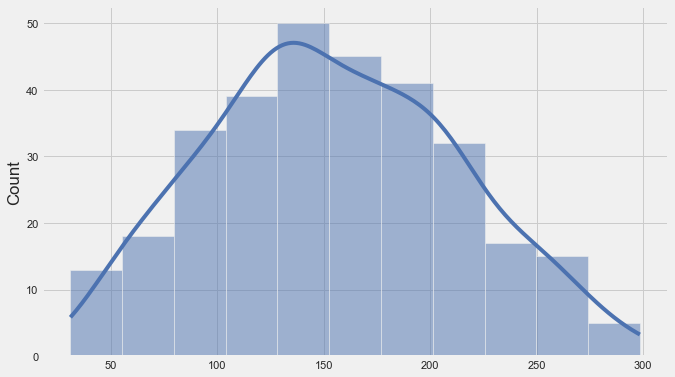

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(results.fittedvalues,kde=True)
plt.show()

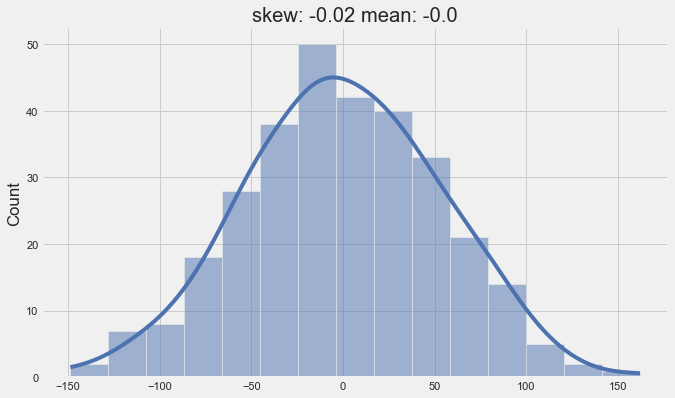

In [20]:
plt.figure(figsize=(10,6))
sk=pd.DataFrame(results.resid).skew()[0]
sns.histplot(results.resid,kde=True)
plt.title(f'skew: {round(sk,3)} mean: {round(results.resid.mean(),3)}')
plt.show()

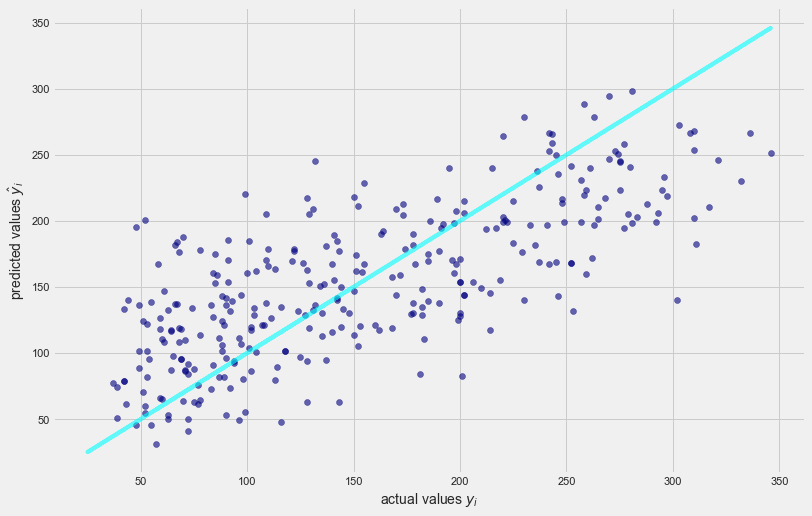

In [21]:

plt.figure(figsize=(12,8))
plt.scatter(x=Y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.plot(target,target,color='cyan',alpha=0.6)
plt.xlabel("actual values $y _i$", fontsize=14)
plt.ylabel("predicted values $\haty _i$",fontsize=14)
plt.show()

## Using Sklearn built in LinearRegrssion module

In [22]:
regr=LinearRegression()
results=regr.fit(X_train,Y_train)
coF=pd.DataFrame(results.coef_,columns=featurs.columns).transpose()
coF.columns=['coef_']

In [23]:
results.score(x_test,y_test)
a=results.predict(x_test)
print(mse(y_test,results.predict(x_test)))

3087.193239509519


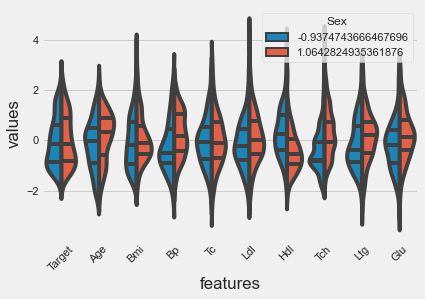

In [62]:
x=(data.Target-data.Target.mean())/data.Target.std()
y=data.drop(['Target'],axis=1)
features_bar=(y-y.mean())/y.std()
features=pd.concat([x,features_bar.iloc[:,0:10]],axis=1)
features=pd.melt(features,id_vars='Sex',var_name='features',value_name='values')
plt.style.use('fivethirtyeight')
sns.violinplot(x='features',y='values',data=features,split=True,inner='quart',hue='Sex')
plt.xticks(rotation=45)
plt.show()

In [63]:
y.describe()

,Age,Sex,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


<AxesSubplot:xlabel='features', ylabel='values'>

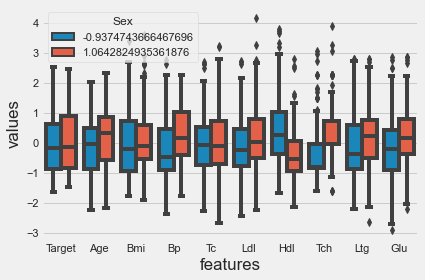

In [64]:
sns.boxplot(x='features',y='values',data=features,hue="Sex")

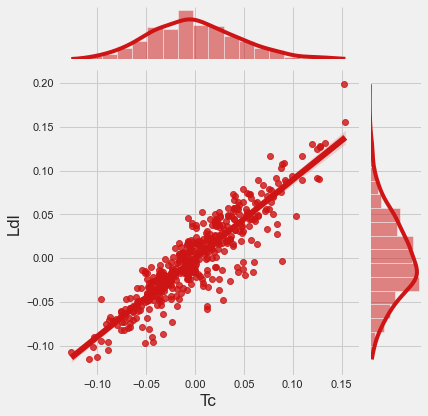

In [65]:
sns.jointplot(x=data.Tc,y=data.Ldl,kind='reg',color='#ce1414')

C:\Users\Re\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Re\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Re\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Re\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Re\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points cannot be plac

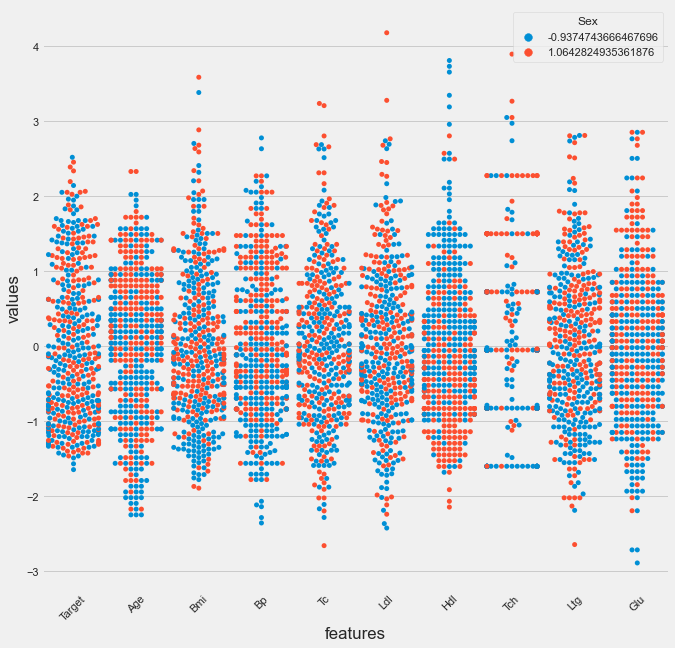

In [71]:
x=(data.Target-data.Target.mean())/data.Target.std()
y=data.drop(['Target'],axis=1)
features_bar=(y-y.mean())/y.std()
features=pd.concat([x,features_bar.iloc[:,0:10]],axis=1)
features=pd.melt(features,id_vars='Sex',var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='values',data=features,hue='Sex')
plt.xticks(rotation=45)
plt.show()

In [68]:
data.columns

Index(['Age', 'Sex', 'Bmi', 'Bp', 'Tc', 'Ldl', 'Hdl', 'Tch', 'Ltg', 'Glu',
       'Target'],
      dtype='object')